In [1]:
# Importing the Required Libraries

import scipy.ndimage
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from utils import words_dict

Using TensorFlow backend.


In [2]:
# Loading our Fine Tuned VGG16 Model

model = load_model('Fine_Tuned_VGG16.h5')

In [3]:
# Load an Image

image_RGB = cv2.imread('download.jpg', 1)

In [4]:
# Converting to GRAY_SCALE

image_GRAY = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)

In [5]:
# Segmenting the images

ret, thresh = cv2.threshold(image_GRAY,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [6]:
# Noise Removal Process

# Closing operation 
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 2) 
# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 1)   
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.01 * dist_transform.max(), 255, 0)

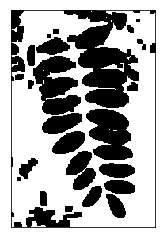

In [7]:
# Display The Final Transformed Image

plt.imshow(fg, cmap="Greys_r")
plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# Adding 3 channels to image and resizing it into (224, 224)

nchannels = 3
image = np.resize(fg, (224, 224, nchannels))

image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

In [9]:
# Predicting the Results

prediction = model.predict(image).tolist()[0]
print(prediction)

[0.014250560663640499, 0.1422475278377533, 0.008944918401539326, 0.0007246885797940195, 0.4690897464752197, 0.1279885619878769, 0.1115751713514328, 0.017577650025486946, 0.08517228066921234, 0.022428924217820168]


In [10]:
# Predicting the Actual Label for the image

label = str(prediction.index(max(prediction)) + 1)
words_dict[label]

' cedrus deodara'

---